# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [223]:
import pandas as pd

In [224]:
import requests

In [225]:
import tweepy

In [226]:
import numpy as np

In [227]:
import matplotlib.pyplot as plt

In [228]:
import re

In [229]:
twitter_archive = pd.read_csv('/Users/kubrasirin/Downloads/twitter-archive-enhanced.csv')

In [230]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [231]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2. Using Twitter API 

In [232]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [233]:
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [234]:
image_pred = pd.read_csv('image_predictions.tsv', sep = '\t')

In [235]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [236]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [19]:
consumer_key = "xxx" # put here your API Key
consumer_secret ="yyy" # put here your API Key Secret
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [178]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [21]:
%%time

import json

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            print("Success")
            outfile.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
        

print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 539


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Rate limit reached. Sleeping for: 541


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

In [179]:
pd.read_json('tweet_json.txt', lines = True)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2321,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2322,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2323,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [237]:
extended_tweets = pd.read_json('tweet_json.txt', lines = True)

In [238]:
extended_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2325 non-null   datetime64[ns, UTC]
 1   id                             2325 non-null   int64              
 2   id_str                         2325 non-null   int64              
 3   full_text                      2325 non-null   object             
 4   truncated                      2325 non-null   bool               
 5   display_text_range             2325 non-null   object             
 6   entities                       2325 non-null   object             
 7   extended_entities              2055 non-null   object             
 8   source                         2325 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [239]:
extended_tweets.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Tidiness issues
1. three dataframes needs to be merged into one 

2. dogs' stages column (doggo, floofer, pupper and puppo) needs to be aggregated into one column

### Quality issues
1. change the timestamp column's datatype: datatype is object, not a datetime

2. drop retweeted_status related columns; retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to related columns; in_reply_to_status_id and in_reply_to_user_id columns which are redundant

3. remove the urls from the text column

4. format p1, p2 and p3 columns have inconsistency of their string format, having lower/upper case

5. duplicate rows control whether there are duplicate rows or not

6. name, doggo, pupper, puppo columns have 'None' values but programmatically this format does not seem as NULL.

7. clean the rating_numerator values above 15

8. detect invalid names in the "name" column such as "a"

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

### Issue #1: three dataframes needs to be merged into one

#### Define: not to have repeated columns three dataframes merged into one dataframe

#### Code

In [240]:
#copied the relevant columns (id, retweet count and favorite count) into a new dataframe
tweets = extended_tweets[['id', 'retweet_count', 'favorite_count']].copy()

In [241]:
tweets = tweets.rename(columns={'id': 'tweet_id'})

In [242]:
#now we have three different dataframes that need to be merged
#As I would like to preserve all the data before the assessment, I will go for a left join.


merged_data_ = pd.merge(twitter_archive, tweets, on = 'tweet_id', how = 'left')

In [243]:
merged_data_orginal = pd.merge(merged_data_, image_pred, on ='tweet_id', how = 'left')

In [244]:
# Make copies of original pieces of data
merged_data = merged_data_orginal.copy()

#### Test

In [245]:
merged_data.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2080,670823764196741120,NaN,NaN,2015-11-29 04:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Remington. He's a man dime. 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670823764...,...,1.0,Labrador_retriever,0.947453,True,German_short-haired_pointer,0.017001,True,Weimaraner,0.015432,True
1520,690728923253055490,NaN,NaN,2016-01-23 02:53:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vinscent. He was just questioned about...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690728923...,...,1.0,kuvasz,0.422806,True,golden_retriever,0.291586,True,Great_Pyrenees,0.076189,True
1911,674410619106390016,NaN,NaN,2015-12-09 02:09:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenny. He wants to be a sprinkler. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674410619...,...,1.0,brown_bear,0.698207,False,sea_lion,0.046475,False,beagle,0.019427,True
1320,706346369204748288,NaN,NaN,2016-03-06 05:11:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. She's a Beneboom Cumberwiggle. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706346369...,...,1.0,Tibetan_mastiff,0.956462,True,Rottweiler,0.025381,True,Appenzeller,0.008679,True
1574,687480748861947905,NaN,NaN,2016-01-14 03:45:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another magnificent photo. 12/10 https://t.co/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687480748...,...,1.0,English_springer,0.472273,True,English_setter,0.166862,True,Brittany_spaniel,0.163411,True


In [246]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Issue #2: dogs' stage columns (doggo, floofer, pupper and puppo) needs to be aggregated into one column

#### Define: the best practice is to have one stage column to use the data effectively

#### Code

In [247]:
#replacing None values with empty rows
merged_data.doggo.replace('None', '', inplace=True)
merged_data.floofer.replace('None', '', inplace=True)
merged_data.pupper.replace('None', '', inplace=True)
merged_data.puppo.replace('None', '', inplace=True)


In [248]:
#concatenation of the columns into a new column called dog_breeds
merged_data['dog_stages'] = merged_data['doggo'] + merged_data['floofer'] + merged_data['pupper'] + merged_data['puppo'] 

In [249]:
#handling with multiple breeds
merged_data.loc[merged_data.dog_stages == 'doggopupper', 'dog_breeds'] = 'doggo, pupper'
merged_data.loc[merged_data.dog_stages == 'doggopuppo', 'dog_breeds'] = 'doggo, puppo'
merged_data.loc[merged_data.dog_stages == 'doggofloofer',  'dog_breeds'] = 'doggo, floofer'

#### Test

In [250]:
merged_data['dog_stages'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stages, dtype: int64

### Issue #3: change the timestamp column's datatype: datatype is object, not a datetime

#### Define: time column's data type is object, not a DateTime

#### Code

In [251]:
#changing datatypte to DateTime from object
merged_data['timestamp'] =  pd.to_datetime(merged_data['timestamp'])

#### Test

In [252]:
merged_data.timestamp.info()

<class 'pandas.core.series.Series'>
Int64Index: 2356 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype              
--------------  -----              
2356 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 36.8 KB


### Issue #4: drop retweeted_status related columns; retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to related columns; in_reply_to_status_id and in_reply_to_user_id columns which are redundant

#### Define: dropping redundant columns 

#### Code

In [253]:
#checking the columns names
merged_data.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'dog_stages', 'dog_breeds'],
      dtype='object')

In [257]:
# Remove rows that have non-empty retweeted_status_id
merged_data.drop(merged_data.loc[merged_data.retweeted_status_id.notnull()].index, inplace=True)   # 181 rows

In [260]:
# Remove rows that have non-empty retweeted_status_user_id
merged_data.drop(merged_data.loc[merged_data.retweeted_status_user_id.notnull()].index, inplace=True) 

In [ ]:
# Remove rows that have non-empty retweeted_status_timestamp
merged_data.drop(merged_data.loc[merged_data.retweeted_status_timestamp.notnull()].index, inplace=True) 

In [262]:
#dropping the redundant columns related to retweeted_status
merged_data = merged_data.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

In [263]:
#dropping the redundant columns related to in_reply_to_status
merged_data = merged_data.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis=1)

#### Test

In [264]:
merged_data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'retweet_count', 'favorite_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'dog_stages', 'dog_breeds'],
      dtype='object')

In [258]:
merged_data[merged_data.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages,dog_breeds


In [259]:
merged_data[merged_data.retweeted_status_user_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages,dog_breeds


In [261]:
merged_data[merged_data.retweeted_status_timestamp.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages,dog_breeds


### Issue #5: remove the urls from the text column

#### Define: remove the redundant urls

#### Code

In [208]:
# creating a new column without urls
merged_data['cleaned_text'] = merged_data['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [213]:
# dropping the previous column
merged_data = merged_data.drop(columns='text')

#### Test

In [215]:
# checking whether urls are removed
merged_data['cleaned_text'].sample(5)

261     This is Charlie. He's wishing you a very fun a...
2113    Meet Hank and Sully. Hank is very proud of the...
2338    Not familiar with this breed. No tail (weird)....
903     This is Odie. He falls asleep wherever he want...
2280    This is Fwed. He is a Canadian Asian Taylormad...
Name: cleaned_text, dtype: object

### Issue #6: format p1, p2 and p3 columns have inconsistency of their string format, having lower/upper case

#### Define: formatting inconsistent strings

#### Code

In [77]:
#making p1, p2, p3 columns lowercase string
merged_data['p1'] = merged_data['p1'].str.lower()
merged_data['p2'] = merged_data['p2'].str.lower()
merged_data['p3'] = merged_data['p3'].str.lower()

#### Test

In [78]:
merged_data.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
1197,717009362452090881,2016-04-04 15:22:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Smokey. He's having some sort of exist...,https://twitter.com/dog_rates/status/717009362...,10,10,Smokey,,,...,siberian_husky,0.506154,True,eskimo_dog,0.269656,True,malamute,0.060658,True,pupper
626,795076730285391872,2016-11-06 01:33:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She loves going down slides bu...,https://twitter.com/dog_rates/status/795076730...,11,10,Bailey,,,...,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False,
891,759557299618865152,2016-07-31 01:12:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Emma. She can't believe her last guess...,https://twitter.com/dog_rates/status/759557299...,10,10,Emma,,,...,golden_retriever,0.763333,True,chesapeake_bay_retriever,0.194251,True,labrador_retriever,0.012225,True,
1766,678399652199309312,2015-12-20 02:20:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This made my day. 12/10 please enjoy https://t...,https://twitter.com/dog_rates/status/678399652...,12,10,None,,,...,swing,0.929196,False,bedlington_terrier,0.015047,True,great_pyrenees,0.014039,True,
360,829861396166877184,2017-02-10 01:15:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Mia. She already knows she's a good do...,https://twitter.com/dog_rates/status/829861396...,12,10,Mia,,,...,border_terrier,0.394486,True,staffordshire_bullterrier,0.376574,True,american_staffordshire_terrier,0.031292,True,


### Issue #7: duplicate rows control whether there are duplicate rows or not

#### Define: deleting duplicate rows

#### Code

In [79]:
#creating a dataframe with the existing dataset
merged_data_df = pd.DataFrame(merged_data)

#### Test

In [80]:
#checking whether there is any duplicated data
duplicate = merged_data_df[merged_data_df.duplicated()]
duplicate

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages


### Issue #8: name, doggo, pupper, puppo columns have aggregated but empty cells need to be changed with 'None'

#### Define: Convert '' values to None

#### Code

In [82]:
#replacing None values with empty rows
merged_data.dog_stages.replace('', None, inplace=True)

#### Test

In [84]:
merged_data.dog_stages.value_counts()

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stages, dtype: int64

In [216]:
merged_data.sample(5)

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages,dog_breeds,cleaned_text
11,889880896479866881,2017-07-25 16:11:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,,,,...,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False,,NaN,This is Bruno. He is a service shark. Only get...
97,873337748698140672,2017-06-10 00:35:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,,,pupper,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pupper,NaN,RT @dog_rates: This is Sierra. She's one preci...
1810,676821958043033607,2015-12-15 17:51:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/676821958...,11,10,None,,,,...,True,kuvasz,0.079814,True,standard_poodle,0.013263,True,,NaN,Finally some constructive political change in ...
835,768193404517830656,2016-08-23 21:09:14+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/768193404...,8,10,Gerald,doggo,,,...,False,ram,0.300851,False,cheetah,0.094474,False,doggo,NaN,Meet Gerald. He's a fairly exotic doggo. Floof...
1694,681281657291280384,2015-12-28 01:12:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/681281657...,11,10,Sarge,,,,...,True,Pekinese,0.000391,True,Great_Pyrenees,0.000224,True,,NaN,Meet Sarge. His parents signed him up for danc...


### Issue #9: clean the rating_numerator values above 15

#### Define: define and clean the rating_numerator which are above 15

#### Code

In [219]:
# defining the rating_numerators above 15
merged_data.query('rating_numerator >= 15')

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages,dog_breeds,cleaned_text
55,881633300179243008,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",NaN,17,10,None,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,@roushfenway These are good dogs but 17/10 is ...
188,855862651834028034,2017-04-22 19:15:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",NaN,420,10,None,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,@dhmontgomery We also gave snoop dogg a 420/10...
189,855860136149123072,2017-04-22 19:05:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",NaN,666,10,None,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,@s8n You tried very hard to portray this good ...
285,838916489579200512,2017-03-07 00:57:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/KibaDva/status/83890598062...,15,10,None,,,,...,False,monitor,0.001406,False,envelope,0.001093,False,,NaN,RT @KibaDva: I collected all the good dogs!! 1...
290,838150277551247360,2017-03-04 22:12:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",NaN,182,10,None,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,@markhoppus 182/10
291,838085839343206401,2017-03-04 17:56:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",NaN,15,10,None,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,@bragg6of8 @Andy_Pace_ we are still looking fo...
313,835246439529840640,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",NaN,960,0,None,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,@jonnysun @Lin_Manuel ok jomny I know you're e...
340,832215909146226688,2017-02-16 13:11:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,"RT @dog_rates: This is Logan, the Chow who liv..."
433,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/820690176...,84,70,None,,,,...,True,kuvasz,0.059526,True,Samoyed,0.037400,True,,NaN,The floofs have been released I repeat the flo...
516,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...","https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,,,,...,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,,NaN,Meet Sam. She smiles 24/7 &amp; secretly aspir...


In [220]:
# cleaning the meaningless rows with ratings above 15
merged_data = merged_data.drop(merged_data.query('rating_numerator >= 15').index)

#### Test

In [221]:
# it looks like rows with ratings above 15 were cleaned
merged_data.query('rating_numerator >= 15')

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages,dog_breeds,cleaned_text


### Issue #10: detect invalid names in the "name" column such as "a"

#### Define: Detect invalid names 

#### Code

In [86]:
#Checking the names to define the pattern in invalid names
names = merged_data.name.value_counts().keys().tolist()
names

['None',
 'a',
 'Charlie',
 'Cooper',
 'Lucy',
 'Oliver',
 'Tucker',
 'Penny',
 'Lola',
 'Winston',
 'Bo',
 'Sadie',
 'the',
 'Daisy',
 'Buddy',
 'Toby',
 'an',
 'Bailey',
 'Leo',
 'Oscar',
 'Stanley',
 'Rusty',
 'Bella',
 'Dave',
 'Jack',
 'Koda',
 'Scout',
 'Jax',
 'Milo',
 'Louis',
 'Phil',
 'Sammy',
 'Gus',
 'Chester',
 'Alfie',
 'Sunny',
 'Bentley',
 'very',
 'Oakley',
 'Finn',
 'George',
 'Larry',
 'Clarence',
 'Loki',
 'Walter',
 'Reggie',
 'Hank',
 'Scooter',
 'Duke',
 'quite',
 'Reginald',
 'Maggie',
 'Luna',
 'Maddie',
 'Dexter',
 'Jerry',
 'Carl',
 'Ruby',
 'Riley',
 'Clark',
 'Chip',
 'Brody',
 'just',
 'Sophie',
 'Sampson',
 'Boomer',
 'Winnie',
 'Gary',
 'Archie',
 'Jeffrey',
 'Gerald',
 'one',
 'Cassie',
 'Maximus',
 'Moose',
 'Bear',
 'Bruce',
 'Beau',
 'Derek',
 'Shadow',
 'Rory',
 'Waffles',
 'Earl',
 'Nala',
 'Louie',
 'Colby',
 'Otis',
 'Doug',
 'Rosie',
 'Wyatt',
 'Lily',
 'Coco',
 'Kyle',
 'Olive',
 'Peaches',
 'Vincent',
 'Reese',
 'Jimothy',
 'Frankie',
 'Ted',


In [87]:
# It seems that non-capitalized names are invalid, like a, an, the...The names with non-capitalized initials
invalid_names = merged_data.name.str.contains('^[a-z]', regex = True)
merged_data[invalid_names].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [267]:
# assigning invalid names into a list 
invalid_name_list = merged_data[invalid_names].name.value_counts().keys().to_list()

/var/folders/90/6dwf9ryx7tj2tffxtqt9qcbm0000gn/T/ipykernel_94241/1798032228.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  invalid_name_list = merged_data[invalid_names].name.value_counts().keys().to_list()


In [277]:
invalid_name_list

['a',
 'the',
 'an',
 'one',
 'very',
 'quite',
 'just',
 'getting',
 'not',
 'actually',
 'old',
 'light',
 'life',
 'officially',
 'by',
 'infuriating',
 'such',
 'all',
 'unacceptable',
 'this',
 'mad',
 'his',
 'my',
 'incredibly',
 'space']

In [285]:
# changing invalid names with none
merged_data = merged_data.replace(invalid_name_list, None)

#### Test

In [286]:
merged_data.name.isin(invalid_name_list)

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: name, Length: 2175, dtype: bool

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [287]:
merged_data.to_csv('twitter_archive_master.csv', index = False)

In [288]:
ls *.csv

twitter_archive_master.csv


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [289]:
# make a copy of the master csv
twitter_archive = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master_copy = twitter_archive.copy()
twitter_archive_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   expanded_urls       2117 non-null   object 
 5   rating_numerator    2175 non-null   int64  
 6   rating_denominator  2175 non-null   int64  
 7   name                2071 non-null   object 
 8   doggo               87 non-null     object 
 9   floofer             10 non-null     object 
 10  pupper              234 non-null    object 
 11  puppo               25 non-null     object 
 12  retweet_count       2167 non-null   float64
 13  favorite_count      2167 non-null   float64
 14  jpg_url             1994 non-null   object 
 15  img_num             1994 non-null   float64
 16  p1    

In [290]:
twitter_archive_master_copy[['rating_numerator', 'retweet_count', 'favorite_count']].describe()

,rating_numerator,retweet_count,favorite_count
count,2175.000000,2167.000000,2167.000000
mean,13.215172,2196.599446,7385.844485
std,47.725696,3912.813678,10907.515246
min,0.000000,0.000000,43.000000
25%,10.000000,468.500000,1562.500000
50%,11.000000,1041.000000,3329.000000
75%,12.000000,2503.500000,9168.000000
max,1776.000000,69493.000000,141976.000000


1) What are the top dog stages by the tweet counts?

In [291]:
# Count the number of not-none dog stages
top_stages = \
twitter_archive_master_copy[twitter_archive_master_copy.dog_stages != 'none'].dog_stages.value_counts()
print("Top stages and number of tweets")
print("--------------------------")
print(top_stages)

top_stages_per = round(sum(top_stages) * 100 / twitter_archive_master_copy.shape[0])
print("\nTop dog stages generates {}% of total tweets".format(top_stages_per))

Top stages and number of tweets
--------------------------
pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stages, dtype: int64

Top dog stages generates 16% of total tweets


2. What is the number one month in terms of number of tweets?

In [292]:
twitter_archive_master_copy['timestamp'] =  pd.to_datetime(twitter_archive_master_copy['timestamp'])

In [293]:
# Create a month column
twitter_archive_master_copy['month'] = twitter_archive_master_copy.timestamp.dt.month

In [294]:
# Group and Order by the number of tweets based on the month
twitter_archive_master_copy.groupby(twitter_archive_master_copy["month"]).tweet_id.count().sort_values(ascending=False)

month
12    447
11    358
1     265
2     197
3     193
7     150
6     144
4     109
5     105
10     73
9      69
8      65
Name: tweet_id, dtype: int64

3. What's the number of tweets, retweets and favorites trends over time?

In [295]:
# Add a new column for only date (excluding hour)
twitter_archive_master_copy['date'] = twitter_archive_master_copy['timestamp'].dt.date

In [296]:
# Create a new dataframe with tweets and date
tweets = twitter_archive_master_copy[['date', 'tweet_id']].groupby(['date']).count().sort_values(by=['date'], ascending=False)

In [297]:
# Use averages to smooth the line
tweets['tweet_id'] = tweets['tweet_id'].rolling(window=20).mean()

In [298]:
# Create a new dataframe with retweets and date
retweets = twitter_archive_master_copy[['date', 'retweet_count']].groupby(['date']).sum().sort_values(by=['date'], ascending=False)

In [299]:
# Use averages to smooth the line
retweets['retweet_count'] = retweets['retweet_count'].rolling(window=20).mean()

In [300]:
# Create a new dataframe with favorites and date
favorites = twitter_archive_master_copy[['date', 'favorite_count']].groupby(['date']).sum().sort_values(by=['date'], ascending=False)

In [301]:
# Use averages to smooth the line
favorites['favorite_count'] = favorites['favorite_count'].rolling(window=20).mean()

### Insights:
1. The pupper is the most prevalent stages among dog stages, however tweets mostly don't have the stage info as the dog stages generates 16% of total tweets.

2. December is the month that WeRateDog followers twitted the most compared to other months.

3. Based on the visualization, even though total new tweets over time is not growing, the number of retweets and favorites show the rising interest over time.

### Visualization

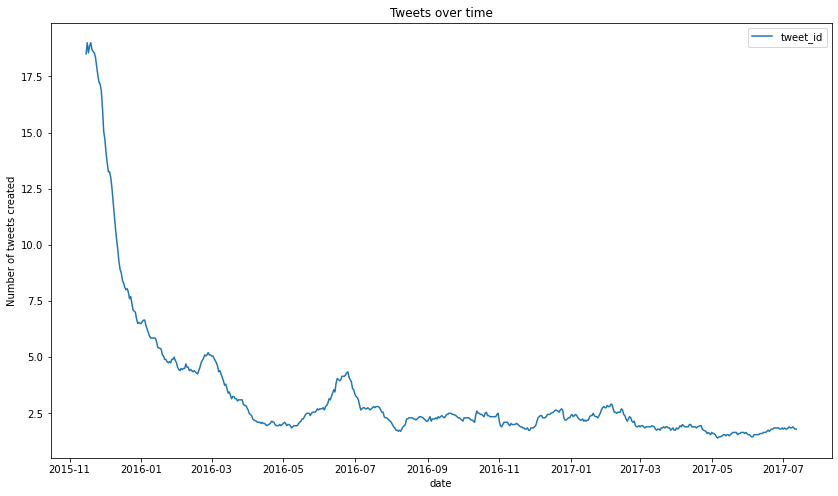

In [302]:
# Plot, trend line for the number of tweets
tweets.plot(figsize=(14, 8), title='Tweets over time')
plt.ylabel('Number of tweets created')
plt.show()

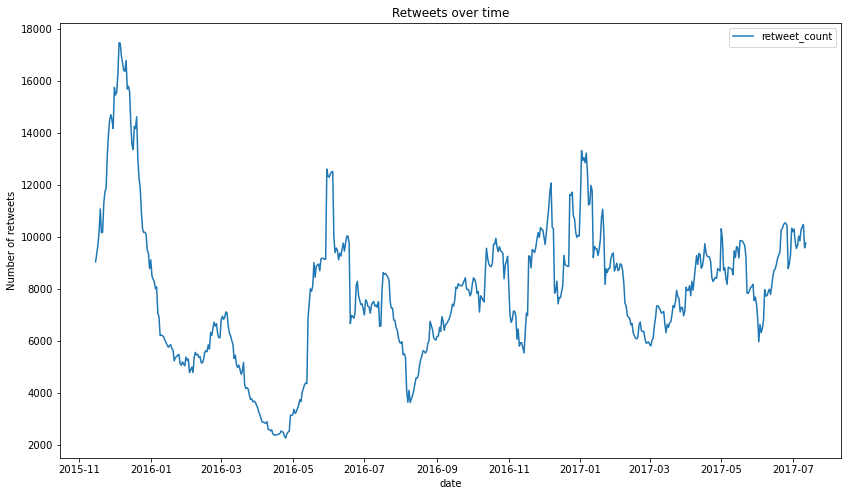

In [303]:
# Plot, trend line for the number of retweets
retweets.plot(figsize=(14, 8), title='Retweets over time')
plt.ylabel('Number of retweets')
plt.show()

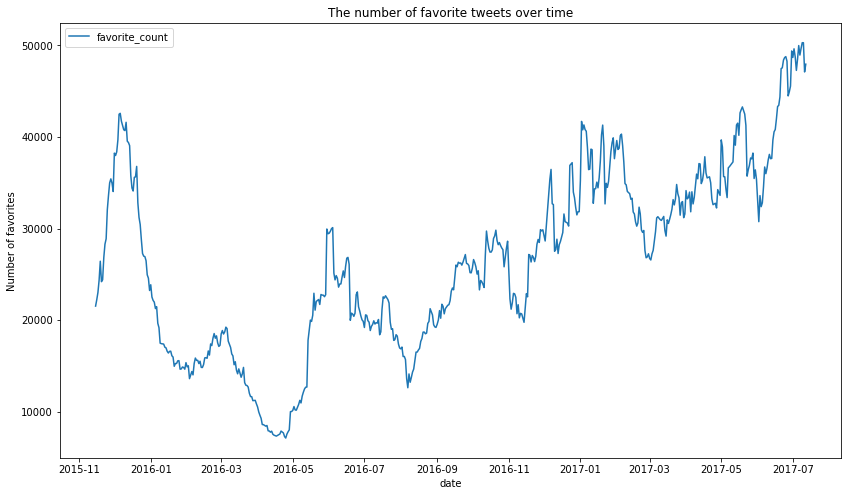

In [304]:
# Plot, trend line for the number of favorites
favorites.plot(figsize=(14, 8), title='The number of favorite tweets over time')
plt.ylabel('Number of favorites')
plt.show()

In [305]:
tweets.describe()

,tweet_id
count,581.000000
mean,3.420052
std,3.126593
min,1.400000
25%,1.950000
50%,2.350000
75%,3.250000
max,19.000000


In [306]:
retweets.describe()

,retweet_count
count,581.000000
mean,7910.919880
std,2750.343786
min,2267.050000
25%,6123.700000
50%,7839.300000
75%,9388.050000
max,17477.350000


In [307]:
favorites.describe()

,favorite_count
count,581.000000
mean,26473.626162
std,10002.278780
min,7126.500000
25%,18584.800000
50%,26346.400000
75%,34096.900000
max,50291.350000
